In [1]:
import os
import json
import pandas as pd
import numpy as np
import json

from matplotlib import pyplot as plt
import seaborn as sb

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [18]:
sb.set_style("darkgrid")
sb.set_context("paper",  font_scale = 1,
               rc={
                   "grid.linewidth": 2.5,
                   'axes.labelsize': 24,
                   "axes.titlesize": 26,
                   "legend.fontsize": 24.0,
                   'lines.linewidth': 2.5,
                   'xtick.labelsize': 22.0,
                   'ytick.labelsize': 22.0,
               })
current_palette = list(sb.color_palette())
colors = {
    'RL': current_palette[0],
    'RR': current_palette[5],
    'SOP':current_palette[4],
    'RAND':current_palette[7],
    'optimal':current_palette[1],
    '0':current_palette[-2],
    '1':current_palette[-1]
}

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
# TRAIN DATA

In [19]:
opt_cost_dict = {
     0: 22,  1: 56,  2: 56,  3: 60,  4: 22,  5:  54,  6: 27,  7: 12,  8: 14,  9: 120,
    10: 42, 11: 35, 12: 28, 13: 32, 14: 24, 15:  15, 16: 24, 17: 45, 18: 90, 19:  60,
    20: 10, 21: 40, 22: 28, 23: 54, 24: 72, 25: 108, 26: 14, 27: 80, 28: 60, 29:  20
}

exp_dir = '/home/biedenka/git/rl-plan'

opt_pols = {}
for inst in range(30):
    with open(os.path.join(exp_dir, 'artifical-benchmarks', 'train', 'instance%d' % inst, 'optimal.json')) as fh:
        opt_pol = json.load(fh)[1:]
#     print('Instance %d' % inst)
#     print(opt_pol)
#     print(inst, len(opt_pol))
#     print()
    opt_pols[inst] = opt_pol
    opt_cost_dict[inst] = len(opt_pol)


data_dir = "/home/biedenka/git/rl-plan/experiments/baseline_data/"
static_cost = {}
random_cost = {}
round_robin_cost = {}
rl_cost = {}

static_traj = {}
random_traj = {}
round_robin_traj = {}
rl_traj = {}

UNITS=200
train_disentangle_bash = {
    0: 0,
    10: 1,
    11: 2,
    12: 3,
    13: 4,
    14: 5,
    15: 6,
    16: 7,
    17: 8,
    18: 9,
    19: 10,
    1: 11,
    20: 12,
    21: 13,
    22: 14,
    23: 15,
    24: 16,
    25: 17,
    26: 18,
    27: 19,
    28: 20,
    29: 21,
    2: 22,
    3: 23,
    4: 24,
    5: 25,
    6: 26,
    7: 27,
    8: 28,
    9: 29
}
print('Loading Data')
for instance in range(30):
    with open(os.path.join(data_dir, 'train', 'instance-%d-random.json' % instance), 'r') as fh:
        data = json.load(fh)
        random_cost[instance] = (data['mean'], data['stdev'])
        random_traj[instance] = data['trajectories']
        
    means = []
    trajs = [] 
    # Due to the used bash-script the instances were read in the following order:
    #0, 10..19, 1, 20..29, 2..9
    for seed in range(1, 11):
        file=os.path.join(
            exp_dir, 'experiments', "toy_bench",
            "old_feats_wide_long_full_train_set_2-{:d}-{:d}".format(
                UNITS, seed
            ), 'best', 'train-2-{:d}-seed{:d}.json'.format(UNITS, seed)
                         )
#             print(file)
        with open(file, 'r') as fh:
            data = json.load(fh)
        bash_id = train_disentangle_bash[instance]
        tra = data['trajectories'][bash_id]
        means.append(-len(tra))
        trajs.append(tra)

    rl_cost[instance] = (np.mean(means), np.std(means))
    rl_traj[instance] = trajs
    print(instance, rl_cost[instance], len(rl_traj[instance]))
    
    for act in [0, 1]:
        if act not in static_cost:
            static_cost[act] = {}
            static_traj[act] = {}
            round_robin_cost[act] = {}
            round_robin_traj[act] = {}
        with open(os.path.join(data_dir, 'train', 'instance-%d-static-action-%d.json' % (instance, act)), 'r') as fh:
            data = json.load(fh)
            static_cost[act][instance] = (data['mean'], data['stdev'])
            static_traj[act][instance] = data['trajectories']
            
        for switch in range(1, 25):
            if switch not in round_robin_cost[act]:
                round_robin_cost[act][switch] = {}
                round_robin_traj[act][switch] = {}
            with open(os.path.join(data_dir, 'train', 'instance-%d-rr-%d-act%d.json' % (instance, switch, act)), 'r') as fh:
                data = json.load(fh)
                round_robin_cost[act][switch][instance] = (data['mean'], data['stdev'])
                round_robin_traj[act][switch][instance] = data['trajectories']

static_cost['oracle_portfolio'] = {}
static_traj['oracle_portfolio'] = {}
for i in range(len(opt_cost_dict.keys())):
    better_act = 0 if static_cost[0][i] > static_cost[1][i] else 1
    static_cost['oracle_portfolio'][i] = static_cost[better_act][i]
    static_traj['oracle_portfolio'][i] = static_traj[better_act][i]
print('Done')

Loading Data
0 (-24.4, 7.2) 10
1 (-61.1, 13.133544837552424) 10
2 (-61.4, 14.312232530251876) 10
3 (-65.5, 14.03744991086344) 10
4 (-24.4, 7.2) 10
5 (-58.5, 12.224974437601086) 10
6 (-29.2, 6.6) 10
7 (-13.0, 3.0) 10
8 (-15.0, 3.0) 10
9 (-138.2, 54.599999999999994) 10
10 (-45.4, 10.200000000000001) 10
11 (-37.7, 7.457211275000863) 10
12 (-30.9, 6.7) 10
13 (-35.9, 8.178630692236935) 10
14 (-25.7, 5.1000000000000005) 10
15 (-16.2, 2.993325909419153) 10
16 (-25.9, 5.7) 10
17 (-49.0, 11.670475568716126) 10
18 (-98.2, 23.616943070600815) 10
19 (-65.1, 15.299999999999999) 10
20 (-10.7, 2.1) 10
21 (-43.2, 9.6) 10
22 (-30.1, 6.300000000000001) 10
23 (-58.6, 13.46996659238619) 10
24 (-78.2, 17.93766985982293) 10
25 (-124.3, 48.89999999999999) 10
26 (-15.0, 3.0) 10
27 (-86.9, 20.36884876471913) 10
28 (-65.5, 14.03744991086344) 10
29 (-21.5, 4.5) 10
Done


## Ranking old results based on alignment scores

In [20]:
from Bio import pairwise2

exp_dir = '/home/biedenka/git/rl-plan'

the_scores = {'opt': [],
              'rand': [],
              'stat': [],
              'rr': [],
              'rl': []}
inst = 0
for inst in range(30):
    print('Instance %d' % inst)
    with open(os.path.join(exp_dir, 'artifical-benchmarks', 'train', 'instance%d' % inst, 'optimal.json')) as fh:
        a = json.load(fh)[1:]
    print('Static')
    A=''.join(map(str, a))
    b=''.join(map(str, static_traj['oracle_portfolio'][inst][0]))
    alignment = pairwise2.align.globalms(A, b, 1, -1, -1, -1)
    the_scores['stat'].append(pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True))
    print(pairwise2.format_alignment(*alignment[0]))
    print()
    print()

    print('Random')
    scrs = []
    for traj in random_traj[inst]:
        b=''.join(map(str, traj))
        score = pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True)
        scrs.append(score)
    alignment = pairwise2.align.globalms(A, b, 1, -1, -1, -1, one_alignment_only=True)
    print(pairwise2.format_alignment(*alignment[0]))
    print('Mean score: ', np.mean(scrs))
    the_scores['rand'].append(np.mean(scrs))
    print()
    print()
    
    print('RR')
    b=''.join(map(str, round_robin_traj[0][11][inst][0]))  # optimal RR starts with 0 and switches after 11 steps
    score = pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True)
    alignment = pairwise2.align.globalms(A, b, 1, -1, -1, -1, one_alignment_only=True)
    print(pairwise2.format_alignment(*alignment[0]))
    the_scores['rr'].append(pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True))
    print()
    print()

    print('RL-Agent')
    scrs = []
    for traj in rl_traj[inst]:
        b=''.join(map(str, traj))
        score = pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True)
        scrs.append(score)
    alignment = pairwise2.align.globalms(A, b, 1, -1, -1, -1, one_alignment_only=True)
    print(pairwise2.format_alignment(*alignment[0]))
    print('Mean score: ', np.mean(scrs))
    the_scores['rl'].append(np.mean(scrs))
    print()
    print()

    print('Optimal')
    alignment = pairwise2.align.globalms(A, A, 1, -1, -1, -1)
    print(pairwise2.format_alignment(*alignment[0]))
    the_scores['opt'].append(pairwise2.align.globalms(A, A, 1, -1, -1, -1, score_only=True))
    print()
    print()
    print('#'*80)

Instance 0
Static
0000000000011111111111--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
...........|||||||||||                                                                                                                             

0000000000011111111111--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
...........|||||||||||                                                                                                                                               

111111110000000000000000------------------------------------------------------------------------------------------------------------------------
........||||||||||||||||                                                                                                                        
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
  Score=-112



Random
111--1111--10----00-00---000--0-000--0-0-00
|.|  ||||  ||    || ||   |||  | |||  | | ||
1010011110010111100100111000110100011010100
  Score=3

Mean score:  3.2


RR
-----------11111111---00000000000-----------00000
           ||||||||   |||||||||||           |||||
0000000000011111111111000000000001111111111100000
  Score=-1



RL-Agent
111111110000000000000000
|||||||||||||||.|||||||.
111111110000000100000001
  Score=20

Mean score:  20.5


Optimal
111111110000000000000000
||||||||||||||||||||||||
111111110000000000000000
  Score=24





1111111100000000000000001111111111111111-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||................||||||||||||||||                                                                                                                                                                                                                                               
111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
  Score=-231



Random
-11---11------11110---0000000-0-0-0--0--0-00011--1--1-11--111--1--11----1111
 ||   ||      ||||.   ||||||| | | |  |  | |||||  |  | ||  ||

111111111111000000000000000000000000000000000000111111111111000000000000111111111111111111111111000000000000----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
from scipy.stats import rankdata

mat = -np.array([the_scores['stat'], the_scores['rand'], the_scores['rr'], the_scores['rl']][::-1]).astype(float).T

ranks = []
print("[{:^27s}]".format('Cost'), "[{:^22s}]".format('Ranks'))
print('[{:>6s}, {:>5s}, {:>5s}, {:>7s}]'.format('RL', 'RR', 'RAND', 'SOP'),
      '[{:>4s}, {:>4s}, {:>4s}, {:>4s}]'.format('RL', 'RR', 'RAND', 'SOP'))
print('-'*31, '-'*24)
for x in mat:
    rank = rankdata(x)
    print("[{:>+6.1f}, {:>+5.1f}, {:>+5.1f}, {:>+7.1f}]".format(*x),
          "[{:>4.1f}, {:>4.1f}, {:>4.1f}, {:>4.1f}]".format(*rank))
    ranks.append(rank)
ranks=np.array(ranks)
print()
print('AVERAGE RANKS:')
print("[{:>3.2f}, {:>3.2f}, {:>3.2f}, {:>3.2f}]".format(*np.mean(ranks, axis=0)))
print('[{:^4s}, {:^4s}, {:^4s}, {:^4s}]'.format('RL', 'RR', 'RAND', 'SOP'))
print()
print('AVERAGE SCORES:')
print("[{:>7.2f}, {:>7.2f}, {:>7.2f}, {:>7.2f}]".format(*np.mean(-mat, axis=0)))
print('[{:^7s}, {:^7s}, {:^7s}, {:^7s}]'.format('RL', 'RR', 'RAND', 'SOP'))

print()
print('SOP is using the portfolio score')

[           Cost            ] [        Ranks         ]
[    RL,    RR,  RAND,     SOP] [  RL,   RR, RAND,  SOP]
------------------------------- ------------------------
[ -17.9, -22.0,  +0.5,  +812.0] [ 2.0,  1.0,  3.0,  4.0]
[ -47.0, -10.0,  -6.4,  +241.0] [ 1.0,  2.0,  3.0,  4.0]
[ -46.8, -28.0,  -3.0,  +241.0] [ 1.0,  2.0,  3.0,  4.0]
[ -51.5, -15.0,  -2.3,   +55.0] [ 1.0,  2.0,  3.0,  4.0]
[ -17.9, -22.0,  +0.5,  +812.0] [ 2.0,  1.0,  3.0,  4.0]
[ -45.2, -24.0,  -3.4,   +99.0] [ 1.0,  2.0,  3.0,  4.0]
[ -23.0,  -3.0,  -2.5,  +199.0] [ 1.0,  2.0,  3.0,  4.0]
[ -10.6, -10.0,  +1.4,   -11.0] [ 2.0,  3.0,  4.0,  1.0]
[ -11.8,  +8.0,  -1.1,   -13.0] [ 2.0,  4.0,  3.0,  1.0]
[ -90.0, -21.0,  -8.1, +5801.0] [ 1.0,  2.0,  3.0,  4.0]
[ -36.1,  -0.0,  -3.9,  +181.0] [ 1.0,  3.0,  2.0,  4.0]
[ -28.3,  -8.0,  -4.2,   +29.0] [ 1.0,  2.0,  3.0,  4.0]
[ -22.7,  +2.0,  -2.3,  +121.0] [ 1.0,  3.0,  2.0,  4.0]
[ -25.5,  -1.0,  +0.7,  +104.0] [ 1.0,  2.0,  3.0,  4.0]
[ -19.7,  -7.0,  -3.5,   +15.0] [

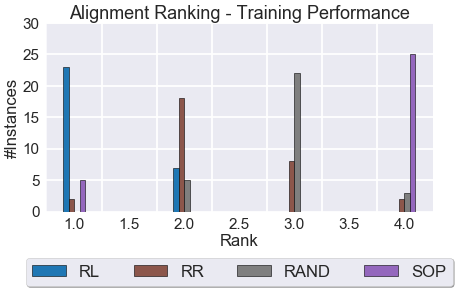

SOP is the static oracle portfolio
RR is the optimal RR schedule


In [22]:
fig = plt.figure(figsize=(10, 5), dpi=50)
plt.title('Alignment Ranking - Training Performance')
plt.hist(ranks, label=['SOP', 'RAND', 'RR', 'RL'][::-1],
         bins=[.9, 1.1, 1.4, 1.6, 1.9, 2.1, 2.4, 2.6, 2.9, 3.1, 3.4, 3.6, 3.9, 4.1],
         align='mid', stacked=False,
         edgecolor='black', rwidth=99,
         color=[colors['RL'], colors['RR'], colors['RAND'], colors['SOP']])
plt.plot([1.25, 1.25], [0, 30], ls='-', c='white')
plt.plot([1.75, 1.75], [0, 30], ls='-', c='white')
plt.plot([2.25, 2.25], [0, 30], ls='-', c='white')
plt.plot([2.75, 2.75], [0, 30], ls='-', c='white')
plt.plot([3.25, 3.25], [0, 30], ls='-', c='white')
plt.plot([3.75, 3.75], [0, 30], ls='-', c='white')
ax = plt.gca()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4)
plt.ylabel('#Instances')
plt.ylim([0, 30])
plt.grid(False, axis='x')
plt.xlabel('Rank')
plt.savefig('alignment_rank_train_{:d}-units.pdf'.format(UNITS), bbox_inches='tight')
plt.savefig('alignment_rank_train.png', bbox_inches='tight')
plt.show()
print('SOP is the static oracle portfolio')
print('RR is the optimal RR schedule')

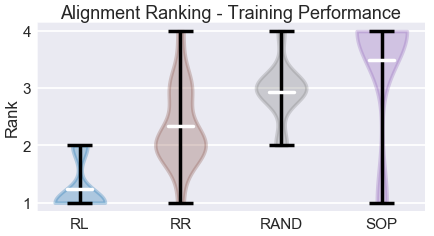

SOP is the static oracle portfolio
RR is the optimal RR schedule


In [23]:
fig = plt.figure(figsize=(10, 5), dpi=50)
plt.title('Alignment Ranking - Training Performance')
vps = plt.violinplot((ranks[:, 0], ranks[:, 1], ranks[:, 2], ranks[:, 3]),
                     showmeans=True, showmedians=False)

for pc, c in zip(vps['bodies'],
                 [colors['RL'], colors['RR'], colors['RAND'], colors['SOP']]):
    pc.set_facecolor(c)
    pc.set_edgecolor(c)
    pc.set_linewidth(5)
    
for partname in ('cbars','cmins','cmaxes'):
    vp = vps[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(5)
vp = vps['cmeans']
vp.set_linewidth(0)
xy = [[l.vertices[:,0],[l.vertices[0,1],l.vertices[0,1]]] for l in vp.get_paths()]
xy = np.array(xy)
for (x, y) in xy:
    plt.plot(x, y, c='white', linewidth=5)

ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['SOP', 'RAND', 'RR', 'RL'][::-1])

plt.grid(False, axis='x')
plt.ylabel('Rank')
plt.savefig('alignment_rank_train_violin_{:d}-units.pdf'.format(UNITS), bbox_inches='tight')
plt.savefig('alignment_rank_train_violin.png', bbox_inches='tight')
plt.show()
print('SOP is the static oracle portfolio')
print('RR is the optimal RR schedule')

In [24]:
staticopc = -np.array(list(static_cost['oracle_portfolio'].values()))[:, 0]
opc = np.array(list(opt_cost_dict.values()))
rropc = -np.array(list(round_robin_cost[0][11].values()))[:, 0]
rlopc = -np.array(list(rl_cost.values()))[:, 0]
randopc = -np.array(list(random_cost.values()))[:, 0]


print('mean Plan-Cost')

for m, v in zip(['SOP ', 'RAND ', '  RR ', '  RL ', ' OPT '],
                [staticopc, randopc, rropc, rlopc, opc]):
    print(m, np.around(np.mean(v), decimals=3))

print()
print('Gap to optimum closed')
for m, v in zip([' SOP ' , 'RAND ', '  RR ', '  RL '],
                [staticopc, randopc, rropc, rlopc]):
    print(m, np.around(np.mean(opc/v), decimals=3))

mean Plan-Cost
SOP  708.667
RAND  83.364
  RR  74.6
  RL  48.49
 OPT  44.133

Gap to optimum closed
 SOP  0.33
RAND  0.535
  RR  0.618
  RL  0.917


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
# TEST DATA

In [25]:
test_opt_cost_dict = {}

exp_dir = '/home/biedenka/git/rl-plan'

test_opt_pols = {}
for inst in range(10):
    with open(os.path.join(exp_dir, 'artifical-benchmarks', 'test', 'instance%d' % inst, 'optimal.json')) as fh:
        opt_pol = json.load(fh)[1:]
#     print('Instance %d' % inst)
#     print(opt_pol)
#     print(inst, len(opt_pol))
#     print()
    test_opt_pols[inst] = opt_pol
    test_opt_cost_dict[inst] = len(opt_pol)


data_dir = "/home/biedenka/git/rl-plan/experiments/baseline_data/"
test_static_cost = {}
test_random_cost = {}
test_round_robin_cost = {}
test_rl_cost = {}

test_static_traj = {}
test_random_traj = {}
test_round_robin_traj = {}
test_rl_traj = {}

print('Loading Data')
for instance in range(10):
    with open(os.path.join(data_dir, 'test', 'instance-%d-random.json' % instance), 'r') as fh:
        data = json.load(fh)
        test_random_cost[instance] = (data['mean'], data['stdev'])
        test_random_traj[instance] = data['trajectories']

    
        
    means = []
    trajs = [] 
    # Due to the used bash-script the instances were read in the following order:
    #0, 10..19, 1, 20..29, 2..9
    for seed in range(1, 11):
        file=os.path.join(
            exp_dir, 'experiments', "toy_bench",
            "old_feats_wide_long_full_train_set_2-{:d}-{:d}".format(
                UNITS, seed
            ), 'best', 'test-2-{:d}-seed{:d}.json'.format(UNITS, seed)
                         )
#             print(file)
        with open(file, 'r') as fh:
            data = json.load(fh)
        bash_id = instance  # no disentangeling necessary as only 0 to 9 was used
        tra = data['trajectories'][bash_id]
        means.append(-len(tra))
        trajs.append(tra)
                  
    test_rl_cost[instance] = (np.mean(means), np.std(means))
    test_rl_traj[instance] = trajs
    print(instance, test_rl_cost[instance], len(test_rl_traj[instance]))
    
    for act in [0, 1]:
        if act not in test_static_cost:
            test_static_cost[act] = {}
            test_static_traj[act] = {}
            test_round_robin_cost[act] = {}
            test_round_robin_traj[act] = {}
        with open(os.path.join(data_dir, 'test', 'instance-%d-action-%d.json' % (instance, act)), 'r') as fh:
            data = json.load(fh)
            test_static_cost[act][instance] = (data['mean'], data['stdev'])
            test_static_traj[act][instance] = data['trajectories']
         
        if act == 0:
            for switch in [11]:
                if switch not in test_round_robin_cost[act]:
                    test_round_robin_cost[act][switch] = {}
                    test_round_robin_traj[act][switch] = {}
                with open(os.path.join(data_dir, 'test', 'instance-%d-rr-%d-act%d.json' % (instance, switch, act)), 'r') as fh:
                    data = json.load(fh)
                    test_round_robin_cost[act][switch][instance] = (data['mean'], data['stdev'])
                    test_round_robin_traj[act][switch][instance] = data['trajectories']

test_static_cost['oracle_portfolio'] = {}
test_static_traj['oracle_portfolio'] = {}
for i in range(len(test_opt_cost_dict.keys())):
    better_act = 0 if test_static_cost[0][i] > test_static_cost[1][i] else 1
    test_static_cost['oracle_portfolio'][i] = test_static_cost[better_act][i]
    test_static_traj['oracle_portfolio'][i] = test_static_traj[better_act][i]
print('Done')

Loading Data
0 (-57.7, 11.1) 10
1 (-97.7, 22.441256649305537) 10
2 (-32.6, 6.575712889109438) 10
3 (-54.0, 16.099689437998485) 10
4 (-53.5, 11.360017605620161) 10
5 (-88.2, 20.94182418033348) 10
6 (-97.8, 23.068593368473945) 10
7 (-53.2, 9.6) 10
8 (-41.4, 16.2) 10
9 (-32.7, 8.1) 10
Done


In [26]:
from Bio import pairwise2

exp_dir = '/home/biedenka/git/rl-plan'

test_scores = {'opt': [],
              'rand': [],
              'stat': [],
              'rr': [],
              'rl': []}
inst = 0
for inst in range(10):
    print('Instance %d' % inst)
    with open(os.path.join(exp_dir,
                           'artifical-benchmarks',
                           'test', 'instance%d' % inst, 'optimal.json')) as fh:
        a = json.load(fh)[1:]
    print('Static')
    A=''.join(map(str, a))
    b=''.join(map(str, test_static_traj['oracle_portfolio'][inst][0]))
    alignment = pairwise2.align.globalms(A, b, 1, -1, -1, -1)
    test_scores['stat'].append(
        pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True))
    print(pairwise2.format_alignment(*alignment[0]))
    print()
    print()

    print('Random')
    scrs = []
    for traj in test_random_traj[inst]:
        b=''.join(map(str, traj))
        score = pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True)
        scrs.append(score)
    alignment = pairwise2.align.globalms(
        A, b, 1, -1, -1, -1, one_alignment_only=True)
    print(pairwise2.format_alignment(*alignment[0]))
    print('Mean score: ', np.mean(scrs))
    test_scores['rand'].append(np.mean(scrs))
    print()
    print()
    
    print('RR')
    b=''.join(map(
        str,
        test_round_robin_traj[0][11][inst][0]
    ))  # optimal RR starts with 0 and switches after 11 steps
    score = pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True)
    alignment = pairwise2.align.globalms(
        A, b, 1, -1, -1, -1, one_alignment_only=True)
    print(pairwise2.format_alignment(*alignment[0]))
    test_scores['rr'].append(pairwise2.align.globalms(
        A, b, 1, -1, -1, -1, score_only=True))
    print()
    print()

    print('RL-Agent')
    scrs = []
    for traj in test_rl_traj[inst]:
        b=''.join(map(str, traj))
        score = pairwise2.align.globalms(A, b, 1, -1, -1, -1, score_only=True)
        scrs.append(score)
    alignment = pairwise2.align.globalms(A, b, 1, -1, -1, -1, one_alignment_only=True)
    print(pairwise2.format_alignment(*alignment[0]))
    print('Mean score: ', np.mean(scrs))
    test_scores['rl'].append(np.mean(scrs))
    print()
    print()

    print('Optimal')
    alignment = pairwise2.align.globalms(A, A, 1, -1, -1, -1)
    print(pairwise2.format_alignment(*alignment[0]))
    test_scores['opt'].append(pairwise2.align.globalms(
        A, A, 1, -1, -1, -1, score_only=True))
    print()
    print()
    print('#'*80)

Instance 0
Static
111111111111111111111111111111111111111111111111000000--------------------------
||||||||||||||||||||||||||||||||||||||||||||||||......                          
11111111111111111111111111111111111111111111111111111111111111111111111111111111
  Score=16



Random
1-11-1--1-1111-111--11111-1--1-1--1-111111--1--1-11-1111-1-1--1-11----1-1--1-1--11110--0-00-00-
| || |  | |||| |||  ||||| |  | |  | ||||||  |  | || |||| | |  | ||    | |  | |  ||||.  | || || 
10110100101111011100111110100101001011111100100101101111010100101100001010010100111111101001001
  Score=11

Mean score:  3.0


RR
1111-------11111111111-----------11111111111-----------11111111111-----------11111111111000000
....       |||||||||||           |||||||||||           |||||||||||           |||||||||||||||||
0000000000011111111111000000000001111111111100000000000111111111110000000000011111111111000000
  Score=6



RL-Agent
111111111111111111111111111111111111111111111111000000
||||||||||||||||||||||||||||||||||

000000000111111111111111111000000000111111111000000000000000000111111111000000000------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|||||||||..................|||||||||.........||||||||||||||||||.........|||||||||         

000000000011111111110000000000-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||..........||||||||||                                                                                                                                                                                                                                                                                                                                                                                                             
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [27]:
from scipy.stats import rankdata

test_mat = -np.array([test_scores['stat'], test_scores['rand'],
                      test_scores['rr'], test_scores['rl']][::-1]).astype(float).T

test_ranks = []
print("[{:^29s}]".format('Cost'), "[{:^22s}]".format('test_ranks'))
print('[{:>6s}, {:>5s}, {:>5s}, {:>7s}]'.format('RL', 'RR', 'RAND', 'SOP'),
      '[{:>4s}, {:>4s}, {:>4s}, {:>4s}]'.format('RL', 'RR', 'RAND', 'SOP'))
print('-'*31, '-'*24)
for x in test_mat:
    rank = rankdata(x)
    print("[{:>+6.1f}, {:>+5.1f}, {:>+5.1f}, {:>+7.1f}]".format(*x),
          "[{:>4.1f}, {:>4.1f}, {:>4.1f}, {:>4.1f}]".format(*rank))
    test_ranks.append(rank)
test_ranks=np.array(test_ranks)
print()
print('AVERAGE RANKS:')
print("[{:>3.2f}, {:>3.2f}, {:>3.2f}, {:>3.2f}]".format(*np.mean(
    test_ranks, axis=0)))
print('[{:^4s}, {:^4s}, {:^4s}, {:^4s}]'.format('RL', 'RR', 'RAND', 'SOP'))
print()
print('AVERAGE SCORES:')
print("[{:>7.2f}, {:>7.2f}, {:>7.2f}, {:>7.2f}]".format(*np.mean(-test_mat, axis=0)))
print('[{:^7s}, {:^7s}, {:^7s}, {:^7s}]'.format('RL', 'RR', 'RAND', 'SOP'))


print()
print('SOP is using the portfolio score')

[            Cost             ] [      test_ranks      ]
[    RL,    RR,  RAND,     SOP] [  RL,   RR, RAND,  SOP]
------------------------------- ------------------------
[ -43.4,  -6.0,  -3.0,   -16.0] [ 1.0,  3.0,  4.0,  2.0]
[ -76.2, -17.0,  -8.5,  +810.0] [ 1.0,  2.0,  3.0,  4.0]
[ -24.8, -16.0,  -0.5,   +46.0] [ 1.0,  2.0,  3.0,  4.0]
[ -36.6,  -1.0,  -5.1, +2912.0] [ 1.0,  3.0,  2.0,  4.0]
[ -40.5,  -7.0,  -7.8,   +99.0] [ 1.0,  3.0,  2.0,  4.0]
[ -68.5, -43.0,  -1.8,  +819.0] [ 1.0,  2.0,  3.0,  4.0]
[ -75.5, -41.0,  -9.1, +1161.0] [ 1.0,  2.0,  3.0,  4.0]
[ -41.3,  -5.0,  -8.4,    -8.0] [ 1.0,  4.0,  2.0,  3.0]
[ -27.2, -12.0,  -0.5, +1444.0] [ 1.0,  2.0,  3.0,  4.0]
[ -25.2, -28.0,  -1.6,  +387.0] [ 2.0,  1.0,  3.0,  4.0]

AVERAGE RANKS:
[1.10, 2.40, 2.80, 3.70]
[ RL ,  RR , RAND, SOP ]

AVERAGE SCORES:
[  45.92,   17.60,    4.63, -765.40]
[  RL   ,   RR   ,  RAND  ,   SOP  ]

SOP is using the portfolio score


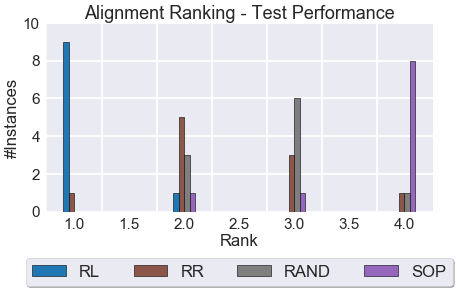

SOP is the static oracle portfolio
RR is the optimal RR schedule


In [28]:
fig = plt.figure(figsize=(10, 5), dpi=50)
plt.title('Alignment Ranking - Test Performance')
N, bins, patches = plt.hist(
    test_ranks, label=['SOP', 'RAND', 'RR', 'RL'][::-1],
    bins=[.9, 1.1, 1.4, 1.6, 1.9, 2.1, 2.4, 2.6, 2.9, 3.1, 3.4, 3.6, 3.9, 4.1],
    align='mid', stacked=False, edgecolor='black', rwidth=99,
    color=[colors['RL'], colors['RR'], colors['RAND'], colors['SOP']]
)
plt.plot([1.25, 1.25], [0, 30], ls='-', c='white')
plt.plot([1.75, 1.75], [0, 30], ls='-', c='white')
plt.plot([2.25, 2.25], [0, 30], ls='-', c='white')
plt.plot([2.75, 2.75], [0, 30], ls='-', c='white')
plt.plot([3.25, 3.25], [0, 30], ls='-', c='white')
plt.plot([3.75, 3.75], [0, 30], ls='-', c='white')
ax = plt.gca()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4)
plt.ylabel('#Instances')
plt.ylim([0, 10])
plt.grid(False, axis='x')
plt.xlabel('Rank')
plt.savefig('alignment_rank_test_{:d}-units.pdf'.format(UNITS), bbox_inches='tight')
plt.savefig('alignment_rank_test.png', bbox_inches='tight')
plt.show()
print('SOP is the static oracle portfolio')
print('RR is the optimal RR schedule')

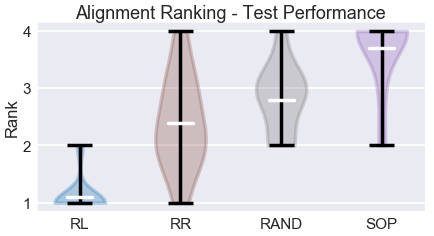

SOP is the static oracle portfolio
RR is the optimal RR schedule


In [29]:
fig = plt.figure(figsize=(10, 5), dpi=50)
plt.title('Alignment Ranking - Test Performance')
vps = plt.violinplot((test_ranks[:, 0], test_ranks[:, 1], test_ranks[:, 2], test_ranks[:, 3]),
                    showmeans=True, showmedians=False)

for pc, c in zip(vps['bodies'],
                 [colors['RL'], colors['RR'], colors['RAND'], colors['SOP']]):
    pc.set_facecolor(c)
    pc.set_edgecolor(c)
    pc.set_linewidth(5)
    
for partname in ('cbars','cmins','cmaxes'):
    vp = vps[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(5)
vp = vps['cmeans']
vp.set_linewidth(0)
xy = [[l.vertices[:,0],[l.vertices[0,1],l.vertices[0,1]]] for l in vp.get_paths()]
xy = np.array(xy)
for (x, y) in xy:
    plt.plot(x, y, c='white', linewidth=5)


ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['SOP', 'RAND', 'RR', 'RL'][::-1])

plt.grid(False, axis='x')
plt.ylabel('Rank')
plt.savefig('alignment_rank_test_violin_{:d}-units.pdf'.format(UNITS), bbox_inches='tight')
plt.savefig('alignment_rank_test_violin.png', bbox_inches='tight')
plt.show()
print('SOP is the static oracle portfolio')
print('RR is the optimal RR schedule')

In [30]:
staticopc = -np.array(list(test_static_cost['oracle_portfolio'].values()))[:, 0]
opc = np.array(list(test_opt_cost_dict.values()))
rropc = -np.array(list(test_round_robin_cost[0][11].values()))[:, 0]
rlopc = -np.array(list(test_rl_cost.values()))[:, 0]
randopc = -np.array(list(test_random_cost.values()))[:, 0]


print('mean Plan-Cost:')

for m, v in zip([' SOP', 'RAND', '  RR ', '  RL ', ' OPT '],
                [staticopc, randopc, rropc, rlopc, opc]):
    print(m, np.around(np.mean(v), decimals=3))

print()
print('Gap to optimum closed')
for m, v in zip([' SOP ' , 'RAND ', '  RR ', '  RL '],
                [staticopc, randopc, rropc, rlopc]):
    print(m, np.around(np.mean(opc/v), decimals=3))

mean Plan-Cost:
 SOP 839.0
RAND 103.5
  RR  91.1
  RL  60.88
 OPT  55.8

Gap to optimum closed
 SOP  0.239
RAND  0.541
  RR  0.645
  RL  0.915


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
# JOINT DATA

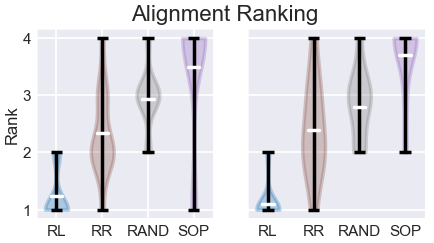

SOP is the static oracle portfolio
RR is the optimal RR schedule


In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=50, sharey=True)
fig.suptitle('Alignment Ranking', fontsize=32)

# TRAIN ################################
vps = ax1.violinplot((ranks[:, 0], ranks[:, 1], ranks[:, 2], ranks[:, 3]),
                    showmeans=True, showmedians=False)

for pc, c in zip(vps['bodies'],
                 [colors['RL'], colors['RR'], colors['RAND'], colors['SOP']]):
    pc.set_facecolor(c)
    pc.set_edgecolor(c)
    pc.set_linewidth(5)
    
for partname in ('cbars','cmins','cmaxes'):
    vp = vps[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(5)
vp = vps['cmeans']
vp.set_linewidth(0)
xy = [[l.vertices[:,0],[l.vertices[0,1],l.vertices[0,1]]] for l in vp.get_paths()]
xy = np.array(xy)
for (x, y) in xy:
    ax1.plot(x, y, c='white', linewidth=5)
ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['SOP', 'RAND', 'RR', 'RL'][::-1])


# TEST #############################
vps = ax2.violinplot((test_ranks[:, 0], test_ranks[:, 1], test_ranks[:, 2],
                      test_ranks[:, 3]),
                    showmeans=True, showmedians=False)

for pc, c in zip(vps['bodies'],
                 [colors['RL'], colors['RR'], colors['RAND'], colors['SOP']]):
    pc.set_facecolor(c)
    pc.set_edgecolor(c)
    pc.set_linewidth(5)
    
for partname in ('cbars','cmins','cmaxes'):
    vp = vps[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(5)
vp = vps['cmeans']
vp.set_linewidth(0)
xy = [[l.vertices[:,0],[l.vertices[0,1],l.vertices[0,1]]] for l in vp.get_paths()]
xy = np.array(xy)
for (x, y) in xy:
    ax2.plot(x, y, c='white', linewidth=5)
ax2.set_xticks([1,2,3,4])
ax2.set_xticklabels(['SOP', 'RAND', 'RR', 'RL'][::-1])

plt.grid(False, axis='x')
ax1.set_ylabel('Rank')
# ax1.set_xlabel('Training Set')
# ax2.set_xlabel('Test Set')
plt.savefig('alignment_rank_all_violin_{:d}-units.pdf'.format(UNITS), bbox_inches='tight')
plt.savefig('alignment_rank_all_violin.png', bbox_inches='tight')
plt.show()
print('SOP is the static oracle portfolio')
print('RR is the optimal RR schedule')